In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
mnist

In [4]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
X = mnist.data
y = mnist.target

In [26]:
X.shape

(70000, 784)

In [27]:
y.shape

(70000,)

In [38]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

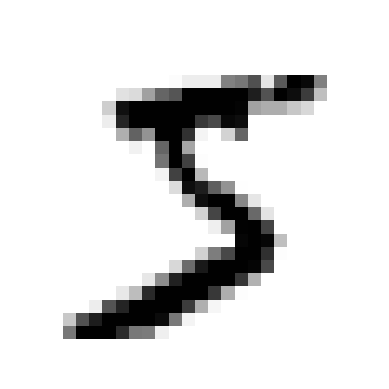

In [49]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [40]:
y[0]

'5'

# Create test set!

In [41]:
X_train = X[:60000]
X_test  = X[60000:]
y_train = y[:60000]
y_test  = y[60000:]

In [42]:
X_train.shape

(60000, 784)

In [45]:
y_train.shape

(60000,)

# Training a very simple binary classifier: is 5 or not? (hot dog or not hot dog)

In [69]:
y_train_5 = (y_train == "5")
y_test_5  = (y_test == "5")

In [65]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

## Stochastic Gradient Descent (SGD) classifier

In [72]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [80]:
sgd_clf.predict([some_digit])

array([ True])

# Performance measures

## Why cross validation is not ideal for classification

In [81]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [84]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
any(dummy_clf.predict(X_train))

False

In [85]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

90% accuracy for the dummy classifier. That's because 90% of images are not 5's, so using cross validation is not so useful for classification.

## Confusion matrices